In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pystan
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from scipy.stats import gaussian_kde
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = "/Users/omarfsosa/anaconda3/envs/stan/bin/ffmpeg"
plt.rcParams['font.size'] = 12

In [3]:
# matplotlib.font_manager.__file__

In [4]:
def logistic(x):
    """Inverse of the logit function."""
    return 1 / (1 + np.exp(-x))

In [5]:
def kde_scipy(samples2d):
    
    kernel = gaussian_kde(samples2d.T)
    
    W0 = samples2d[:,0]
    W1 = samples2d[:,1]
#     WX = np.linspace(W0.min(), W0.max(), 50)
#     WY = np.linspace(W1.min(), W1.max(), 50)
    WX = np.linspace(-4, 4, 50)
    WY = np.linspace(-4, 4, 50)
    WXX, WYY = np.meshgrid(WX, WY)
    positions = np.vstack([WXX.ravel(), WYY.ravel()])
    Z = np.reshape(kernel(positions), WXX.shape)

    return [WX, WY, Z]

In [6]:
X = 4 * np.array(
    [
        [ 0.21, -0.37],
        [-1.16, -1.02],
        [ 0.33, -1.91],
        [-0.76, -1.66],
        [-2.2 , -2.62],
        [-0.21,  0.37],
        [ 1.16,  1.02],
        [-0.33,  1.91],
        [ 0.76,  1.66],
        [ 2.2 ,  2.62],
    ],
)


In [7]:
X1, X2 = np.meshgrid(np.linspace(-15, 15), np.linspace(-15, 15))
grid = np.c_[X1.ravel(), X2.ravel()]

In [8]:
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [9]:
logistic_regression_code = """
data {
    int N;
    int D;
    matrix[N, D] X;
    int y[N];
}

parameters {
    vector[D] beta;
}

model {
    beta ~ normal(0, 1);
    y ~ bernoulli_logit(X*beta);
}
"""

In [10]:
bayes_logistic_regression = pystan.StanModel(model_code=logistic_regression_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_191ee5324203307ea28e32f41b4f0278 NOW.


In [11]:
data = {
    "N": X.shape[0],
    "D": X.shape[1],
    "X": X,
    "y": y,
}

In [12]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)

In [13]:
def logistic_over_grid(weights, meshgrid):
    X1, X2 = meshgrid
    Z = [X1.ravel(), X2.ravel()]
    values =  logistic(weights @ Z)
    return values.reshape(-1, *X1.shape)

In [27]:
samples = bayes_logistic_regression.sampling(data=data, iter=4000)

In [28]:
samples = samples.extract()['beta']

In [17]:
x = np.linspace(-15, 15)
grid = np.meshgrid(x, x)

In [29]:
probas = logistic_over_grid(samples, grid)

In [38]:
)

# Seaborn subplots

In [ ]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)

In [ ]:
h.fig.s

In [69]:
h = sns.jointplot(*samples.T, kind='kde')
h.set_axis_labels('$w_1$', '$w_2$')

In [72]:
for n in range(10):

#     h = sns.jointplot(*samples.T, kind='kde')
#     h.set_axis_labels('$w_1$', '$w_2$')
#     plt.sca(h.ax_joint)
#     plt.plot(*samples[n], color='red', marker='o', markersize=10, markeredgecolor='white')
#     plt.yticks([0, 1, 2, 3, 4])
    
#     h.fig.savefig(f"/Users/omarfsosa/Desktop/jointplot_{n}.pdf", bbox_inches='tight')
#     plt.clf()

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    contour = ax.contourf(X1, X2, probas[n], cmap=cmap)
    ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
    ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
    ax.set(xlabel='$x_1$', ylabel='$x_2$')
    fig.savefig(f"/Users/omarfsosa/Desktop/scatter_{n}.pdf", box_inches='tight')
    plt.clf()
    print("Done", n)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

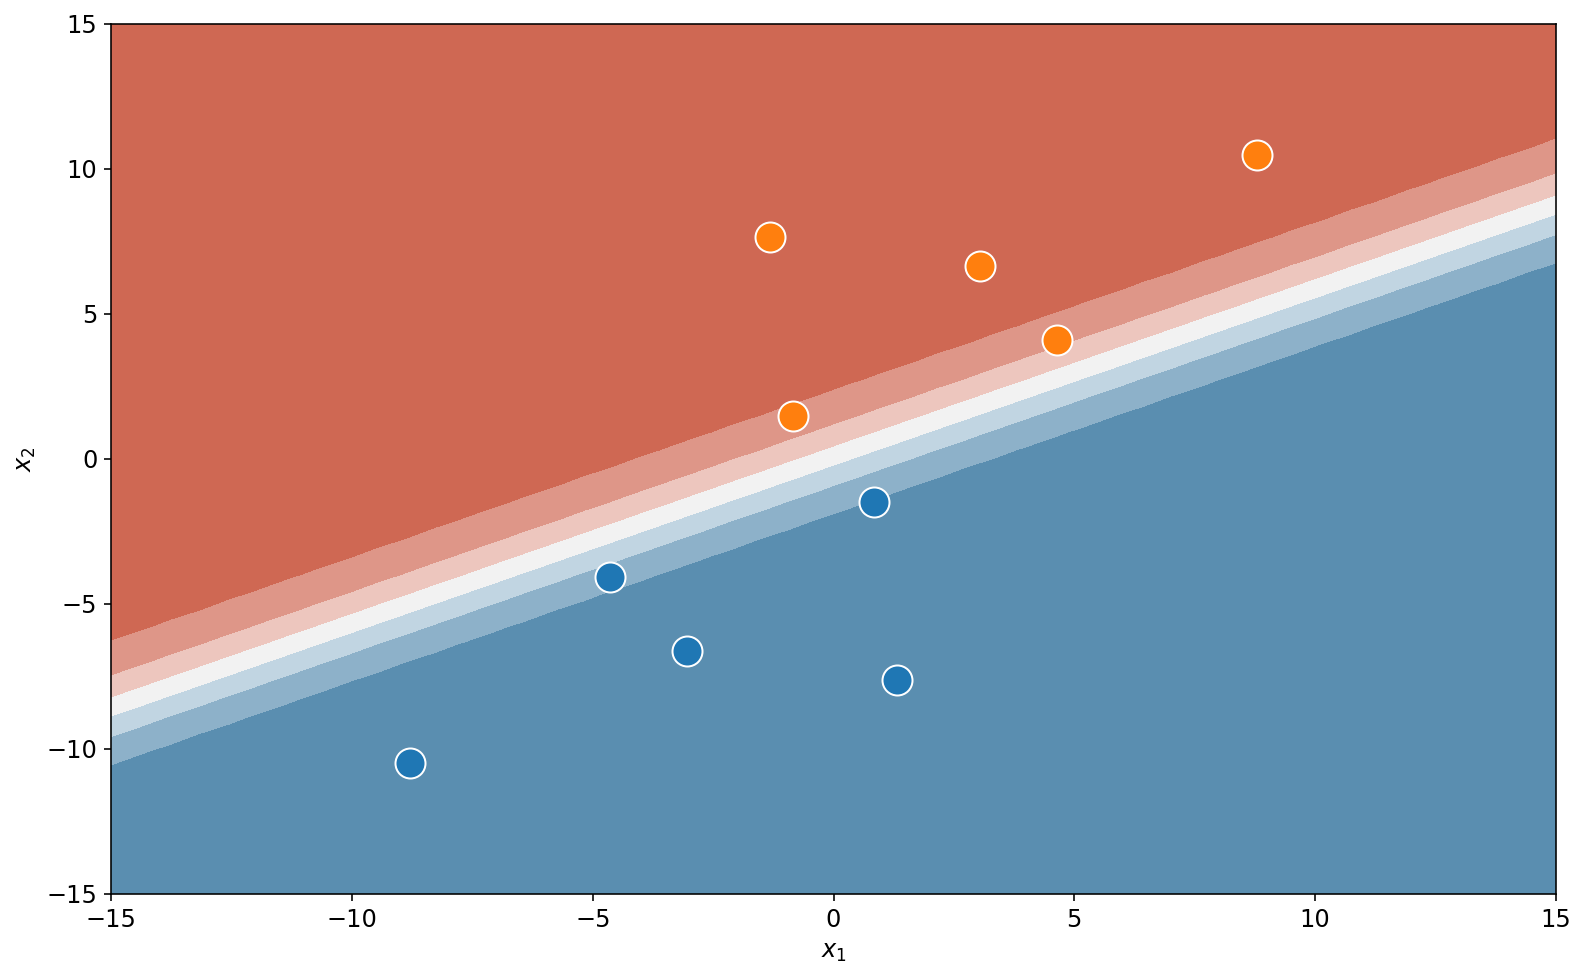

In [49]:

fig, ax = plt.subplots(1, 1, figsize=(8*1.618, 8))
contour = ax.contourf(X1, X2, probas[0], cmap=cmap)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')
# cbar.ax.set_ylabel('Probability of $y=1$')
plt.show()


In [34]:
ax.plot([0, 1], [0, 1])
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(1 + 2 *8 * 1.618, 8))

contour = axes[0].contourf(X1, X2, probas, cmap=cmap, levels=9)
# Data Space
if n:
    axes[0].plot(*x[:n].T, 'o', markersize=15, markeredgecolor='white', zorder=1)
    axes[0].plot(*x[n:].T, "o", markersize=15, markeredgecolor='white', zorder=1)

axes[0].set_xlim([-15, 15])
axes[0].set_ylim([-15, 15])
axes[0].set_title("Data space")

#
# Weights space
axes[1].set_xlabel("$\\beta_1$")
axes[1].set_ylabel("$\\beta_2$")
# axes[1].set_ylim([0, 10])
# axes[1].set_xlim([-6, 6])
axes[1].set_title("Space of weights")
kdeplot = plt.contourf(*kde_scipy(beta_samples), extend='neither', levels=20)
# axes[1].scatter(*mode, label="Mode", marker="o", s=100, c='C1', edgecolors="k")

# Sequence

In [12]:
def get_data(X, y, n):
    xs = []
    ys = []
    
    label = 0
    iter_x0 = iter(X[:len(X)//2])
    iter_x1 = iter(X[len(X)//2:])
    while (n > 0):
        if label == 0:
            xs.append(next(iter_x0))
            ys.append(0)
        if label == 1:
            xs.append(next(iter_x1))
            ys.append(1)

        label = int(not label)
        n -= 1
    
    return {
        "N": len(xs),
        "D": len(xs[0]),
        "X": np.array(xs),
        "y": np.array(ys),
    }

In [13]:
get_data(X, y, 1)

{'N': 1, 'D': 2, 'X': array([[ 0.84, -1.48]]), 'y': array([0])}

In [14]:
import time

In [31]:
data["X"][data["y"] == 1]

array([], shape=(0, 2), dtype=float64)

In [37]:
beta_mode

array([-0.36836116,  0.64901727])

In [40]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
ns = [0, 1, 2, 3, 6, 10]

In [53]:
laplace_logistic.sampling(data=data)

Inference for Stan model: anon_model_42b8508088d70b8ef7862459e049e684.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]   0.16    0.02   0.84  -1.42  -0.34   0.09   0.58   2.07   1151   1.01
beta[2]   1.78    0.04   1.13   0.34   0.96   1.54   2.32    4.6    901   1.01
lp__      -2.9    0.04   1.24   -6.1  -3.48  -2.55  -1.98  -1.52    761   1.01

Samples were drawn using NUTS at Mon Jun 22 07:36:49 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [58]:
centered_laplace = np.array(
    [np.random.laplace(size=2000), np.random.laplace(size=2000)],
).T

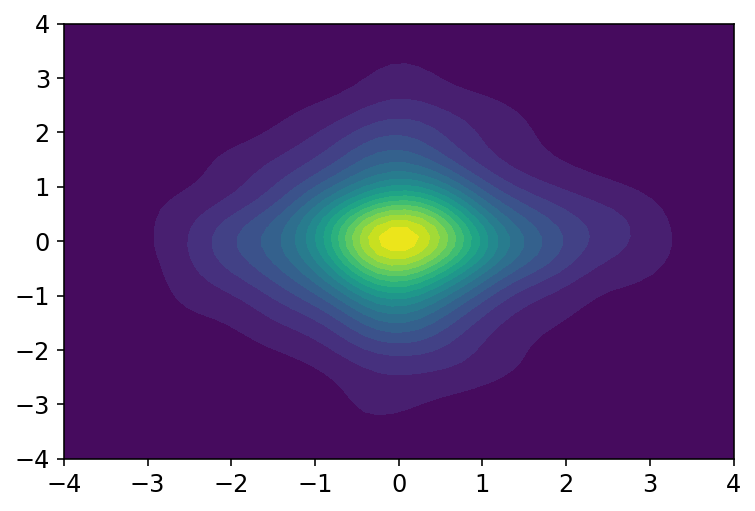

In [59]:
plt.contourf(*kde_scipy(centered_laplace), levels=20)

1
2
3
4
5


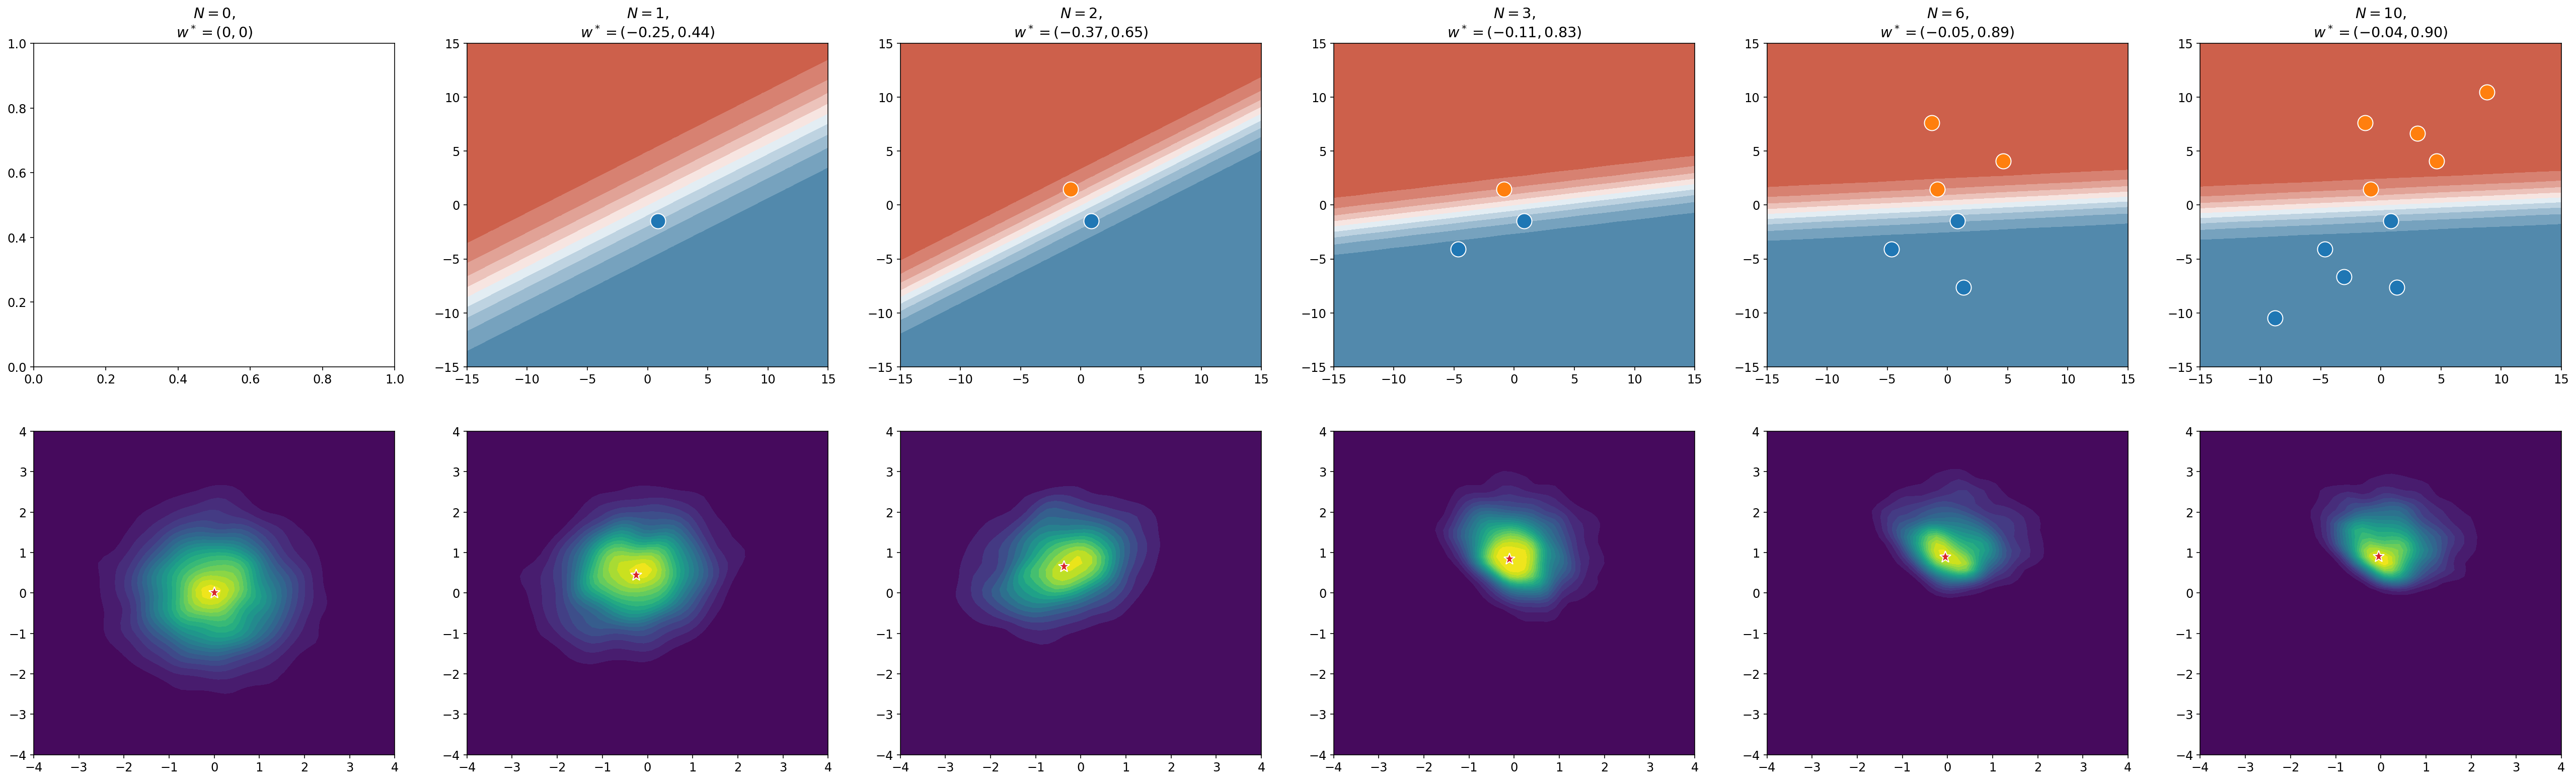

In [63]:
f, axes = plt.subplots(2, 6, figsize=(45, 2*6 + 1), sharex=False, sharey=False)

beta_samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=4000)
axes[1, 0].contourf(*kde_scipy(beta_samples), levels=20)
axes[1, 0].plot(0, 0, marker="*", markerfacecolor='C3', markersize=12, markeredgecolor='white')
axes[1, 0].set_ylim([-4, 4])
axes[1, 0].set_xlim([-4, 4])

axes[0, 0].set_title(f"$N=0$,\n"+ "$w^*=(0, 0)$")

for n, ax in enumerate(axes[1, 1:], start=1):
    print(n)
    data = get_data(X, y, ns[n])
    samples = bayes_logistic_regression.sampling(data=data, iter=1000)
    mode = bayes_logistic_regression.optimizing(data=data)
    beta_samples = samples.extract()["beta"]
    beta_mode = mode["beta"]
    probas = logistic(grid @ np.atleast_2d(beta_mode).T).reshape(X1.shape)
    axes[1, n].contourf(*kde_scipy(beta_samples), levels=20)
    axes[1, n].plot(*beta_mode, marker="*", markerfacecolor='C3', markersize=12, markeredgecolor='white')
    axes[1, n].set_ylim([-4, 4])
    axes[1, n].set_xlim([-4, 4])

    x0 = data["X"][data["y"] == 0]
    x1 = data["X"][data["y"] == 1]
    y0 = data["y"][data["y"] == 0]
    y1 = data["y"][data["y"] == 1]
    
    
    contour = axes[0, n].contourf(X1, X2, probas, cmap=cmap, levels=9)
    axes[0, n].plot(
        *x0.T,
        'o',
        markerfacecolor="C0",
        markersize=15,
        markeredgecolor='white',
        zorder=1,
    )
    axes[0, n].plot(
        *x1.T,
        'o',
        markerfacecolor="C1",
        markersize=15,
        markeredgecolor='white',
        zorder=1,
    )
    axes[0, n].set_ylim([-15, 15])
    axes[0, n].set_xlim([-15, 15])
    axes[0, n].set_title(f"$N={ns[n]}$,\n"+ "$w^*$"+f"$=({beta_mode[0]:0.2f}, {beta_mode[1]:0.2f})$")

In [28]:
beta_mode

array([-0.24964514,  0.43985078])

# Animation

In [11]:
mode = bayes_logistic_regression.optimizing(data=data)['beta']

In [13]:
samples = bayes_logistic_regression.sampling(data=data)

In [54]:
beta_samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=30_000)

In [74]:
kde = kde_scipy(beta_samples)

In [92]:
levels = np.linspace(kde[-1].min(), kde[-1].max())

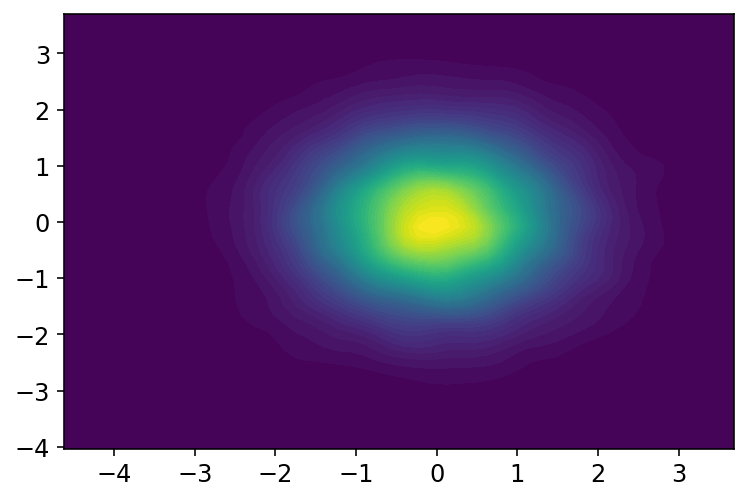

In [93]:
plt.contourf(*kde_scipy(beta_samples), extend='neither', levels=levels)

In [53]:
probas = logistic(grid @ np.array([[0, 1e-10]]).T).reshape(X1.shape)

In [55]:
n = 0

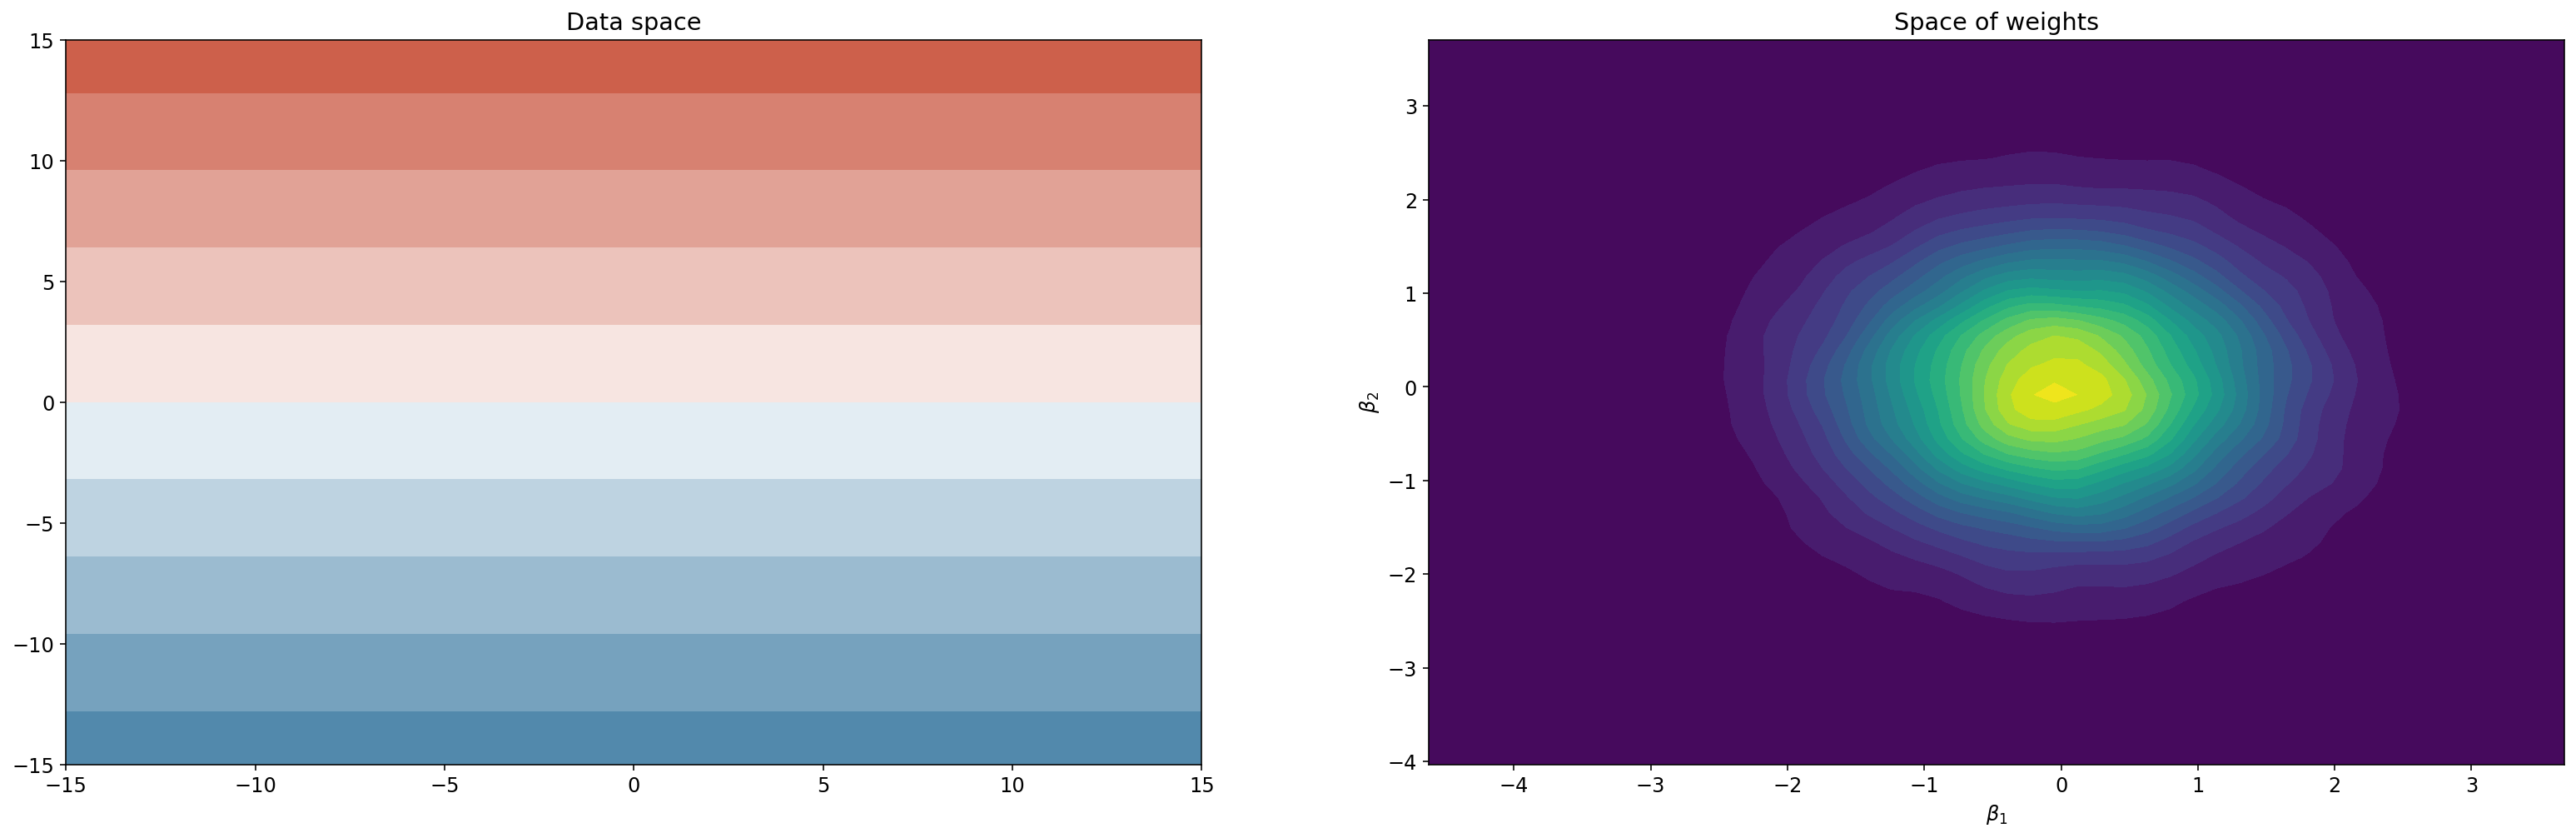

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(1 + 2 *8 * 1.618, 8))

contour = axes[0].contourf(X1, X2, probas, cmap=cmap, levels=9)
# Data Space
if n:
    axes[0].plot(*x[:n].T, 'o', markersize=15, markeredgecolor='white', zorder=1)
    axes[0].plot(*x[n:].T, "o", markersize=15, markeredgecolor='white', zorder=1)

axes[0].set_xlim([-15, 15])
axes[0].set_ylim([-15, 15])
axes[0].set_title("Data space")

#
# Weights space
axes[1].set_xlabel("$\\beta_1$")
axes[1].set_ylabel("$\\beta_2$")
# axes[1].set_ylim([0, 10])
# axes[1].set_xlim([-6, 6])
axes[1].set_title("Space of weights")
kdeplot = plt.contourf(*kde_scipy(beta_samples), extend='neither', levels=20)
# axes[1].scatter(*mode, label="Mode", marker="o", s=100, c='C1', edgecolors="k")

In [ ]:

## Plot samples in weight space
n_sample = 1
plot_samples = axes[1].scatter(*beta_samples[:n_sample].T, s=200, alpha=0.6, marker="+", color='k')

In [ ]:
# fig.savefig(f"/Users/omarfsosa/Documents/Projects/bayesian-statistics/resources/animation_sampling_{n}.pdf", bbox_inches="tight")

In [ ]:
def add_datapoint(n, X, y):
    points = []
    if n % 2 != 0:
        x

In [365]:
def init():
#     samples.set_offsets(np.c_[None])
#     plot_samples.set_offsets(beta_samples[:n_sample + 1])
    weights = np.array([[0, 1e-10]]).T
    probas = logistic(grid @ weights).reshape(X1.shape)
    contour.set_array(np.c_[X1, X2, probas])
    return (samples, contour)


# animation function. This is called sequentially
def animate(i):
    plot_samples.set_offsets(beta_samples[:n_sample + i])
    weights = beta_samples[n_sample + i - 1]
    probas = logistic(grid @ weights).reshape(X1.shape)

    contour = axes[0].contourf(X1, X2, probas, cmap=cmap)
    # Point A
#     axes[0].scatter(0.84, 0.54, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("A", (0.84, 0.54), xytext=(0.86, 0.56), color='w', size=20)

#     # Point B
#     axes[0].scatter(0.1, 0.6, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("B", (0.1, 0.6), xytext=(0.12, 0.62), color='w', size=20)


#     axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
#     axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
#     axes[0].set_xlim([-3, 3])
#     axes[0].set_ylim([-3, 3])
#     axes[0].set_title("Data space")

    return (samples, contour)

In [366]:
anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=np.arange(0, 100),
    interval=250,
#     blit=True
)

In [45]:
# HTML(anim.to_html5_video())

In [25]:
# HTML(anim.to_html5_video())

# anim.save(filename="./sampling_animation_contour.mp4", writer=animation.FFMpegWriter(), dpi=500)

In [ ]:
# Animation
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = "/Users/omarfsosa/anaconda3/envs/stan/bin/ffmpeg"

n = 300
weights = beta_samples[:n]
probas = logistic(grid @ weights.T).mean(axis=1).reshape(X1.shape)
# contour = axes[0].contourf(X1, X2, probas, cmap=cmap)

mode = bayes_logistic_regression.optimizing(data=data)['beta']

fig, axes = plt.subplots(1, 2, figsize=(1 + 2 *8 * 1.618, 8))
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
contour = axes[0].contourf(X1, X2, probas, cmap=cmap, levels=9)

# Data Space
axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white', zorder=1)
axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white', zorder=1)
axes[0].set_xlim([-3, 3])
axes[0].set_ylim([-3, 3])
axes[0].set_title("Data space")

#
# Weights space
axes[1].set_xlabel("$\\beta_1$")
axes[1].set_ylabel("$\\beta_2$")
axes[1].set_ylim([0, 10])
axes[1].set_xlim([-6, 6])
axes[1].set_title("Space of weights")
sns.kdeplot(*beta_samples.T, shade=True, shade_lowest=False, gridsize=200, vertical=True, cbar=False, axes=axes[1])
axes[1].scatter(*mode, label="Mode", marker="o", s=100, c='C1', edgecolors="k")

## Plot samples in weight space
n_sample = 1
plot_samples = axes[1].scatter(*beta_samples[:n_sample].T, s=200, alpha=0.6, marker="+", color='k')

# fig.savefig(f"/Users/omarfsosa/Documents/Projects/bayesian-statistics/resources/animation_sampling_{n}.pdf", bbox_inches="tight")

def init():
#     samples.set_offsets(np.c_[None])
    plot_samples.set_offsets(beta_samples[:n_sample + 1])
    weights = beta_samples[n_sample]
    probas = logistic(grid @ weights).reshape(X1.shape)
    contour.set_array(np.c_[X1, X2, probas])
    return (samples, contour)


# animation function. This is called sequentially
def animate(i):
    plot_samples.set_offsets(beta_samples[:n_sample + i])
    weights = beta_samples[n_sample + i - 1]
    probas = logistic(grid @ weights).reshape(X1.shape)

    contour = axes[0].contourf(X1, X2, probas, cmap=cmap)
    # Point A
#     axes[0].scatter(0.84, 0.54, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("A", (0.84, 0.54), xytext=(0.86, 0.56), color='w', size=20)

#     # Point B
#     axes[0].scatter(0.1, 0.6, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("B", (0.1, 0.6), xytext=(0.12, 0.62), color='w', size=20)


#     axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
#     axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
#     axes[0].set_xlim([-3, 3])
#     axes[0].set_ylim([-3, 3])
#     axes[0].set_title("Data space")

    return (samples, contour)

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=np.arange(0, 100),
    interval=250,
#     blit=True
)

# HTML(anim.to_html5_video())

# HTML(anim.to_html5_video())

# anim.save(filename="./sampling_animation_contour.mp4", writer=animation.FFMpegWriter(), dpi=500)